<div class="alert alert-danger">
    <h4 style="font-weight: bold; font-size: 28px;">Exploratory Data Analysis of Processed Data</h4>
    <p style="font-size: 20px;">NBA API Seasons 2021-22 to 2023-24</p>
</div>

<a name="EDAp"></a>

# Table of Contents

[Setup](#Setup)

[Data](#Data)

**[1. Box Scores](#1.-Box-Scores)**

- [1.1. Rolling Average Box Scores](#1.1.-Rolling-Average-Box-Scores)

**[2. Univariate](#2.-Univariate)**

**[3. Correlations](#3.-Correlations)**

# Setup

[Return to top](#EDAp)

In [1]:
import sys
from pathlib import Path
# get current working directory
cwd = %pwd
# add shared_code directory to Python sys.path
sys.path.append(str(Path(cwd).parent / "shared_code"))
# import all libraries in shared_code directory 'imports.py' file
from imports import *
%matplotlib inline

from matplotlib.patches import Polygon

/Users/sworthin/micromamba/envs/tflow/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data

[Return to top](#EDAp)

In [102]:
team_matchups_all_df = pd.read_csv('../../data/processed/nba_team_matchups_all_rolling_stats_merged_2021_2024_r05.csv')

# convert 'GAME_DATE' column to datetime
team_matchups_all_df['GAME_DATE'] = pd.to_datetime(team_matchups_all_df['GAME_DATE'])

# rename outcome columns
rename_outcomes = {
    'GAME_RESULT': 'GAME WINNER',
    'TOTAL_PTS': 'SCORE TOTAL',
    'PLUS_MINUS': 'SCORE DIFFERENCE'
}

team_matchups_all_df.rename(columns=rename_outcomes, inplace=True)

In [103]:
# outcomes
outcome_columns = ['GAME WINNER', 'SCORE TOTAL', 'SCORE DIFFERENCE']

# get column names
column_names = team_matchups_all_df.columns

# home columns
home_columns = [column for column in column_names if "HOME" in column and column != "HOME_TEAM_NAME"]

# away columns
away_columns = [column for column in column_names if "AWAY" in column and column != "AWAY_TEAM_NAME"]

In [37]:
team_matchups_all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3172 entries, 0 to 3171
Columns: 256 entries, GAME_ID to ROLL_AWAY_DFG_PCT
dtypes: datetime64[ns](1), float64(249), int64(3), object(3)
memory usage: 6.2+ MB


In [38]:
team_matchups_all_df.head()

GAME_ID  GAME WINNER  SCORE TOTAL  SCORE DIFFERENCE  \
0  22100002            0          235              -7.0   
1  22100001            1          231              23.0   
2  22100007            1          253              11.0   
3  22100008            1          230              18.0   
4  22100009            0          214             -20.0   

           HOME_TEAM_NAME SEASON_ID  GAME_DATE  ROLL_HOME_PTS  ROLL_HOME_FGM  \
0      Los Angeles Lakers   2021-22 2021-10-19            NaN            NaN   
1         Milwaukee Bucks   2021-22 2021-10-19            NaN            NaN   
2       Memphis Grizzlies   2021-22 2021-10-20            NaN            NaN   
3  Minnesota Timberwolves   2021-22 2021-10-20            NaN            NaN   
4    New Orleans Pelicans   2021-22 2021-10-20            NaN            NaN   

   ROLL_HOME_FGA  ROLL_HOME_FG_PCT  ROLL_HOME_FG3M  ROLL_HOME_FG3A  \
0            NaN               NaN             NaN             NaN   
1            NaN               NaN             NaN             NaN   
2            NaN               NaN             NaN             NaN   
3            NaN               NaN             NaN             NaN   
4            NaN               NaN             NaN             NaN   

   ROLL_HOME_FG3_PCT  ROLL_HOME_FTM  ROLL_HOME_FTA  ROLL_HOME_FT_PCT  \
0                NaN            NaN            NaN               NaN   
1                NaN            NaN            NaN               NaN   
2                NaN            NaN            NaN               NaN   
3                NaN            NaN            NaN               NaN   
4                NaN            NaN            NaN               NaN   

   ROLL_HOME_OREB  ROLL_HOME_DREB  ROLL_HOME_REB  ROLL_HOME_AST  \
0             NaN             NaN            NaN            NaN   
1             NaN             NaN            NaN            NaN   
2             NaN             NaN            NaN            NaN   
3             NaN             NaN            NaN            NaN   
4             NaN             NaN            NaN            NaN   

   ROLL_HOME_STL  ROLL_HOME_BLK  ROLL_HOME_TOV  ROLL_HOME_PF  ...  \
0            NaN            NaN            NaN           NaN  ...   
1            NaN            NaN            NaN           NaN  ...   
2            NaN            NaN            NaN           NaN  ...   
3            NaN            NaN            NaN           NaN  ...   
4            NaN            NaN            NaN           NaN  ...   

  ROLL_HOME_CFGA  ROLL_HOME_CFG_PCT  ROLL_HOME_UFGM  ROLL_HOME_UFGA  \
0            NaN                NaN             NaN             NaN   
1            NaN                NaN             NaN             NaN   
2            NaN                NaN             NaN             NaN   
3            NaN                NaN             NaN             NaN   
4            NaN                NaN             NaN             NaN   

   ROLL_HOME_UFG_PCT  ROLL_HOME_DFGM  ROLL_HOME_DFGA  ROLL_HOME_DFG_PCT  \
0                NaN             NaN             NaN                NaN   
1                NaN             NaN             NaN                NaN   
2                NaN             NaN             NaN                NaN   
3                NaN             NaN             NaN                NaN   
4                NaN             NaN             NaN                NaN   

   ROLL_AWAY_DIST  ROLL_AWAY_ORBC  ROLL_AWAY_DRBC  ROLL_AWAY_RBC  \
0             NaN             NaN             NaN            NaN   
1             NaN             NaN             NaN            NaN   
2             NaN             NaN             NaN            NaN   
3             NaN             NaN             NaN            NaN   
4             NaN             NaN             NaN            NaN   

   ROLL_AWAY_TCHS  ROLL_AWAY_SAST  ROLL_AWAY_FTAST  ROLL_AWAY_PASS  \
0             NaN             NaN              NaN             NaN   
1             NaN             NaN              NaN             NaN   

In [39]:
team_matchups_all_df.describe()

GAME_ID  GAME WINNER  SCORE TOTAL  SCORE DIFFERENCE  \
count  3.172e+03     3172.000     3172.000          3172.000   
mean   2.220e+07        0.561      226.680             2.103   
min    2.210e+07        0.000      169.000           -56.000   
25%    2.210e+07        0.000      213.000            -8.000   
50%    2.220e+07        1.000      226.000             3.000   
75%    2.220e+07        1.000      240.000            11.000   
max    6.230e+07        1.000      351.000            73.000   
std    7.164e+05        0.496       20.357            14.672   

                           GAME_DATE  ROLL_HOME_PTS  ROLL_HOME_FGM  \
count                           3172       3082.000       3082.000   
mean   2022-11-10 04:52:48.726355456        114.112         41.784   
min              2021-10-19 00:00:00         83.000         30.000   
25%              2022-02-06 00:00:00        109.000         39.800   
50%              2022-12-07 00:00:00        114.400         41.800   
75%              2023-04-02 00:00:00        119.200         43.800   
max              2024-02-04 00:00:00        143.000         56.000   
std                              NaN          7.462          3.003   

       ROLL_HOME_FGA  ROLL_HOME_FG_PCT  ROLL_HOME_FG3M  ROLL_HOME_FG3A  \
count       3082.000          3082.000        3082.000        3082.000   
mean          88.512             0.473          12.634          34.949   
min           75.800             0.309           5.000          22.000   
25%           85.800             0.452          11.000          31.600   
50%           88.200             0.474          12.500          34.600   
75%           91.000             0.494          14.000          38.000   
max          108.000             0.584          20.600          50.000   
std            4.001             0.031           2.258           4.520   

       ROLL_HOME_FG3_PCT  ROLL_HOME_FTM  ROLL_HOME_FTA  ROLL_HOME_FT_PCT  \
count           3082.000       3082.000       3082.000          3082.000   
mean               0.361         17.909         22.927             0.781   
min                0.172          5.000          8.000             0.438   
25%                0.334         15.800         20.400             0.745   
50%                0.361         17.800         22.800             0.784   
75%                0.390         20.000         25.400             0.818   
max                0.526         35.000         40.000             1.000   
std                0.043          3.277          3.838             0.055   

       ROLL_HOME_OREB  ROLL_HOME_DREB  ROLL_HOME_REB  ROLL_HOME_AST  \
count        3082.000        3082.000       3082.000       3082.000   
mean           10.511          33.842         44.353         25.543   
min             4.000          22.000         29.000         14.000   
25%             9.000          32.000         41.800         23.400   
50%            10.400          33.800         44.200         25.400   
75%            11.800          35.600         46.600         27.600   
max            20.200          49.000         64.000         38.000   
std             2.175           2.953          3.698          3.100   

       ROLL_HOME_STL  ROLL_HOME_BLK  ROLL_HOME_TOV  ROLL_HOME_PF  \
count       3082.000       3082.000       3082.000      3082.000   
mean           7.494          4.928         13.180        19.736   
min            3.200          0.000          6.400        13.800   
25%            6.400          4.000         11.800        18.400   
50%            7.400          4.800         13.000        19.800   
75%            8.400          5.800         14.600        21.000   
max           18.000         17.000         25.000        29.000   
std            1.544          1.413          2.035         2.081   

       ROLL_AWAY_PTS  ROLL_AWAY_FGM  ...  ROLL_HOME_CFGA  ROLL_HOME_CFG_PCT  \
count       3082.000       3082.000  ...        3081.000           3081.000   
mean         111.938         41.081  .

<a name="1.-Box-Scores"></a>
# 1. Box Scores

[Return to top](#EDAp)

<a name="1.1.-Rolling-Average-Box-Scores"></a>
## 1.1. Rolling Average Box Scores

[Return to top](#EDAp)

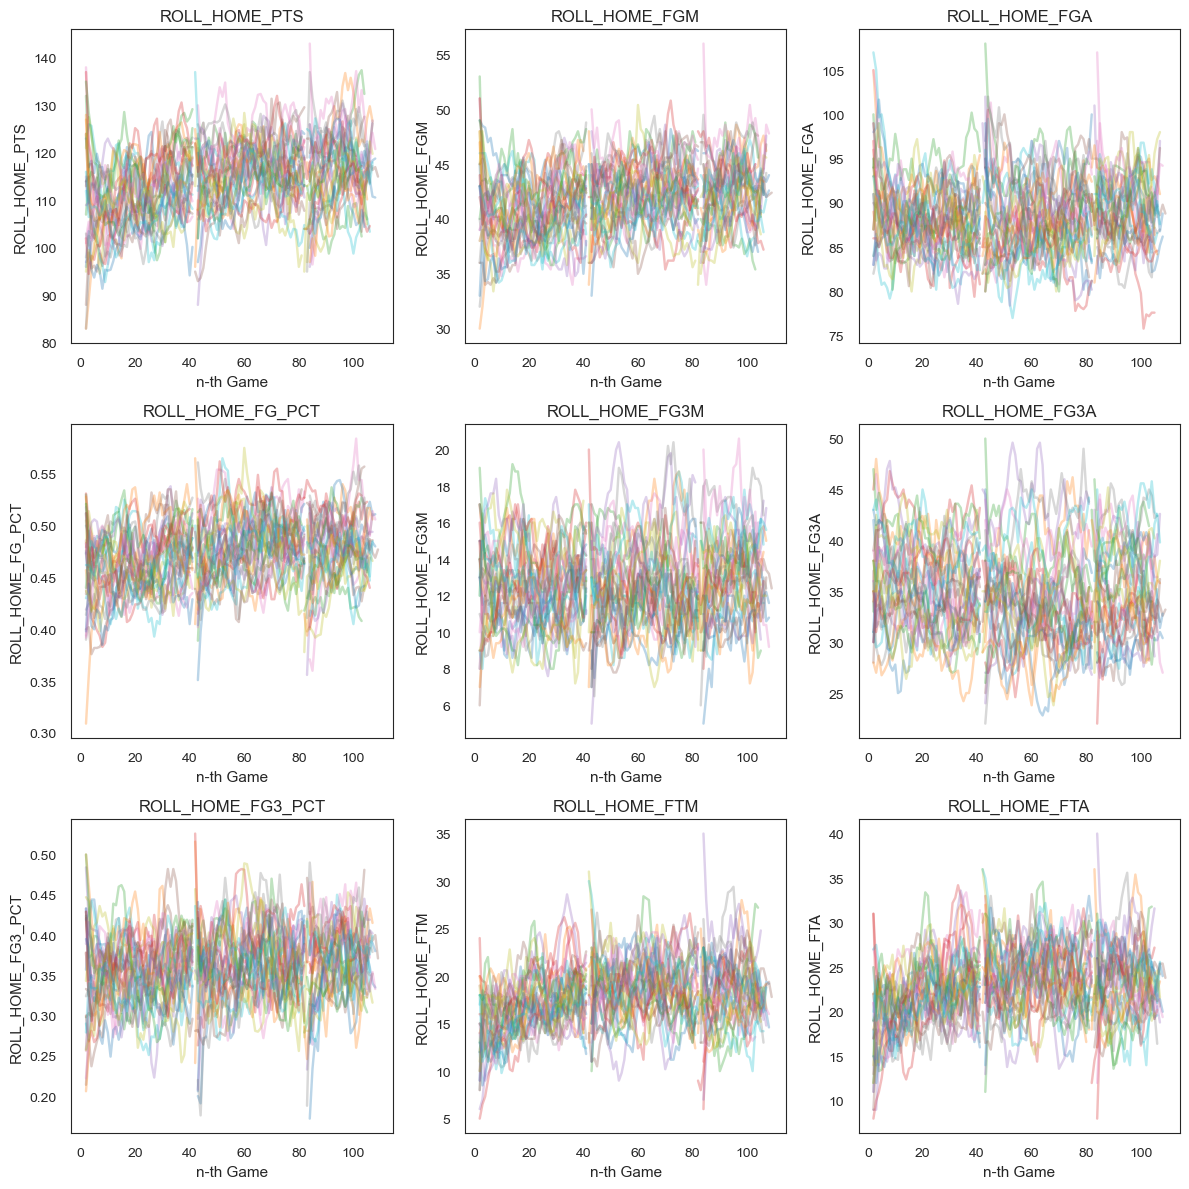

In [6]:
# plot for Home Teams
utl.plot_team_bs_stats(team_matchups_all_df, 'HOME_TEAM_NAME', 'ROLL_HOME_')

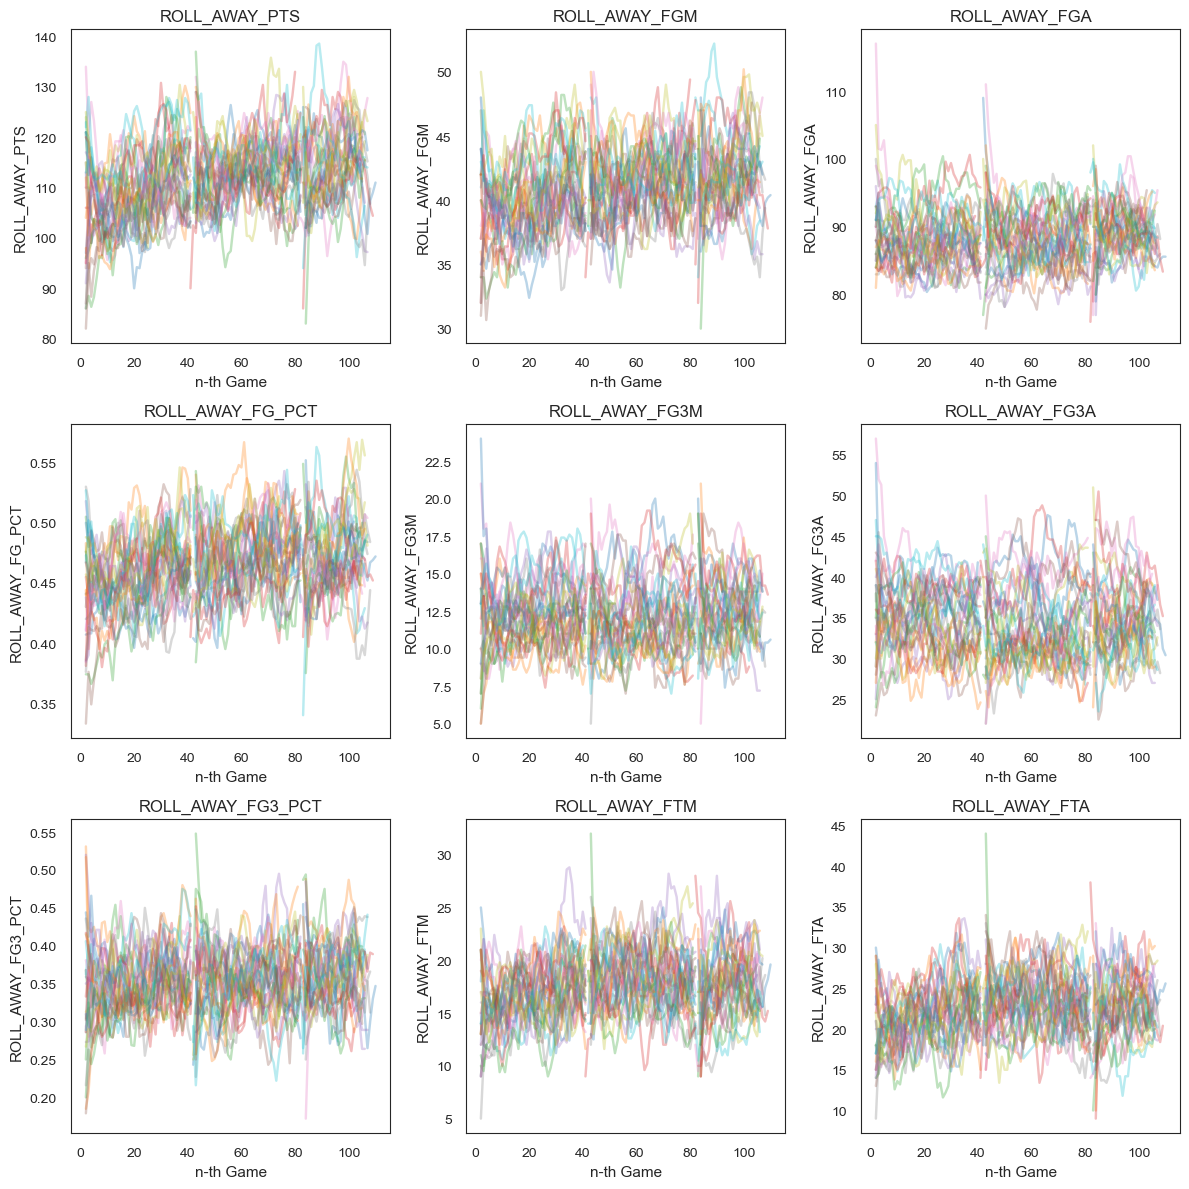

In [7]:
# plot for Away Teams
utl.plot_team_bs_stats(team_matchups_all_df, 'AWAY_TEAM_NAME', 'ROLL_AWAY_')

<a name="2.-Univariate"></a>
# 2. Univariate

[Return to top](#EDAp)

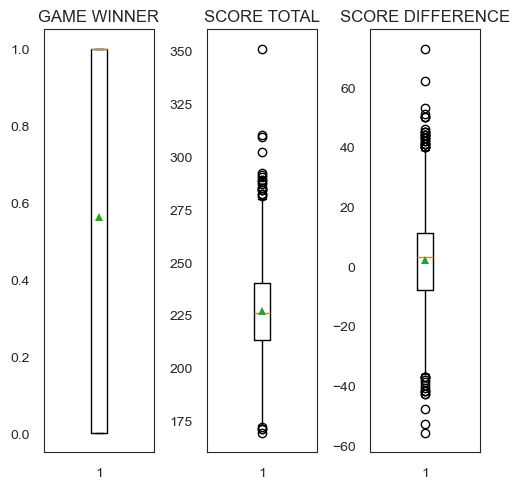

In [41]:
fig, axs = plt.subplots(1, 3, figsize=(5, 5))

for i, ax in enumerate(axs.flatten()):
    ax.boxplot(team_matchups_all_df[outcome_columns[i]],
               showmeans = True) 
    ax.set_title(outcome_columns[i])

plt.tight_layout()
plt.show()


In [21]:
filtered_df = team_matchups_all_df.dropna(how='any')

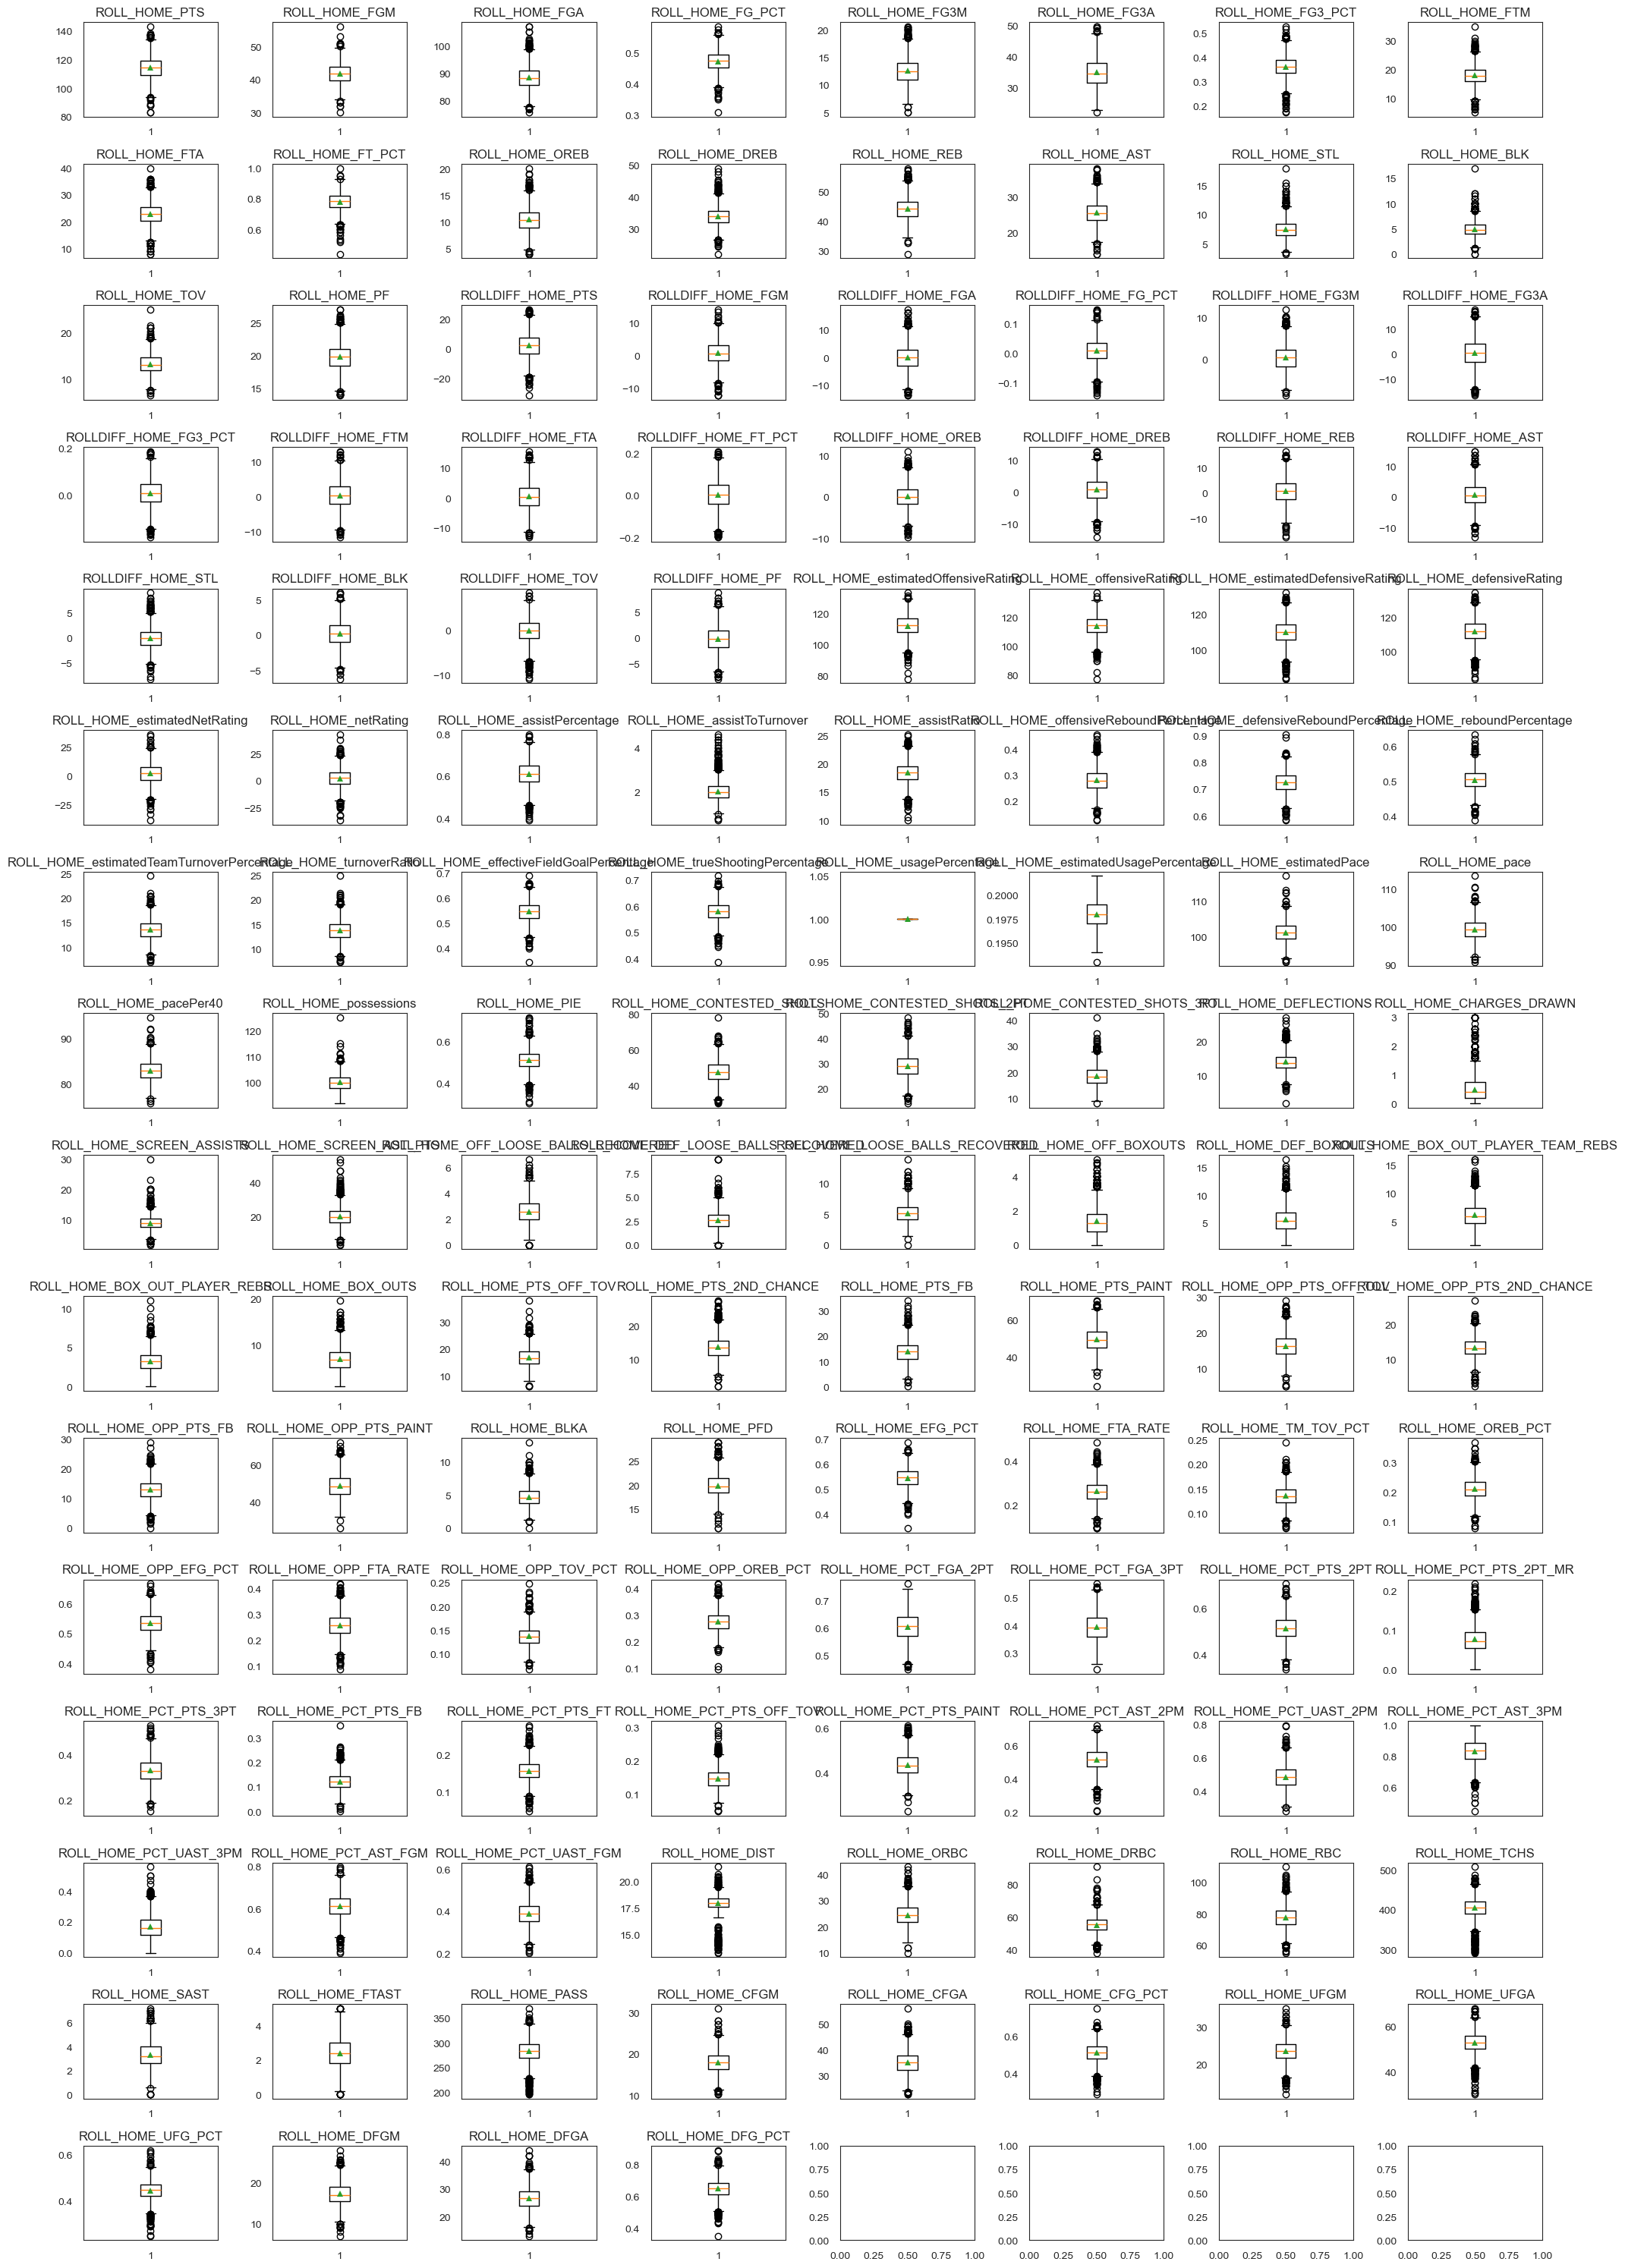

In [29]:
fig, axs = plt.subplots(16, 8, figsize=(20, 30)) 

flat_axs = axs.flatten()

for col_name, ax in zip(home_columns, flat_axs):
    ax.boxplot(filtered_df[col_name], showmeans=True)
    ax.set_title(col_name)

plt.tight_layout()
plt.show()

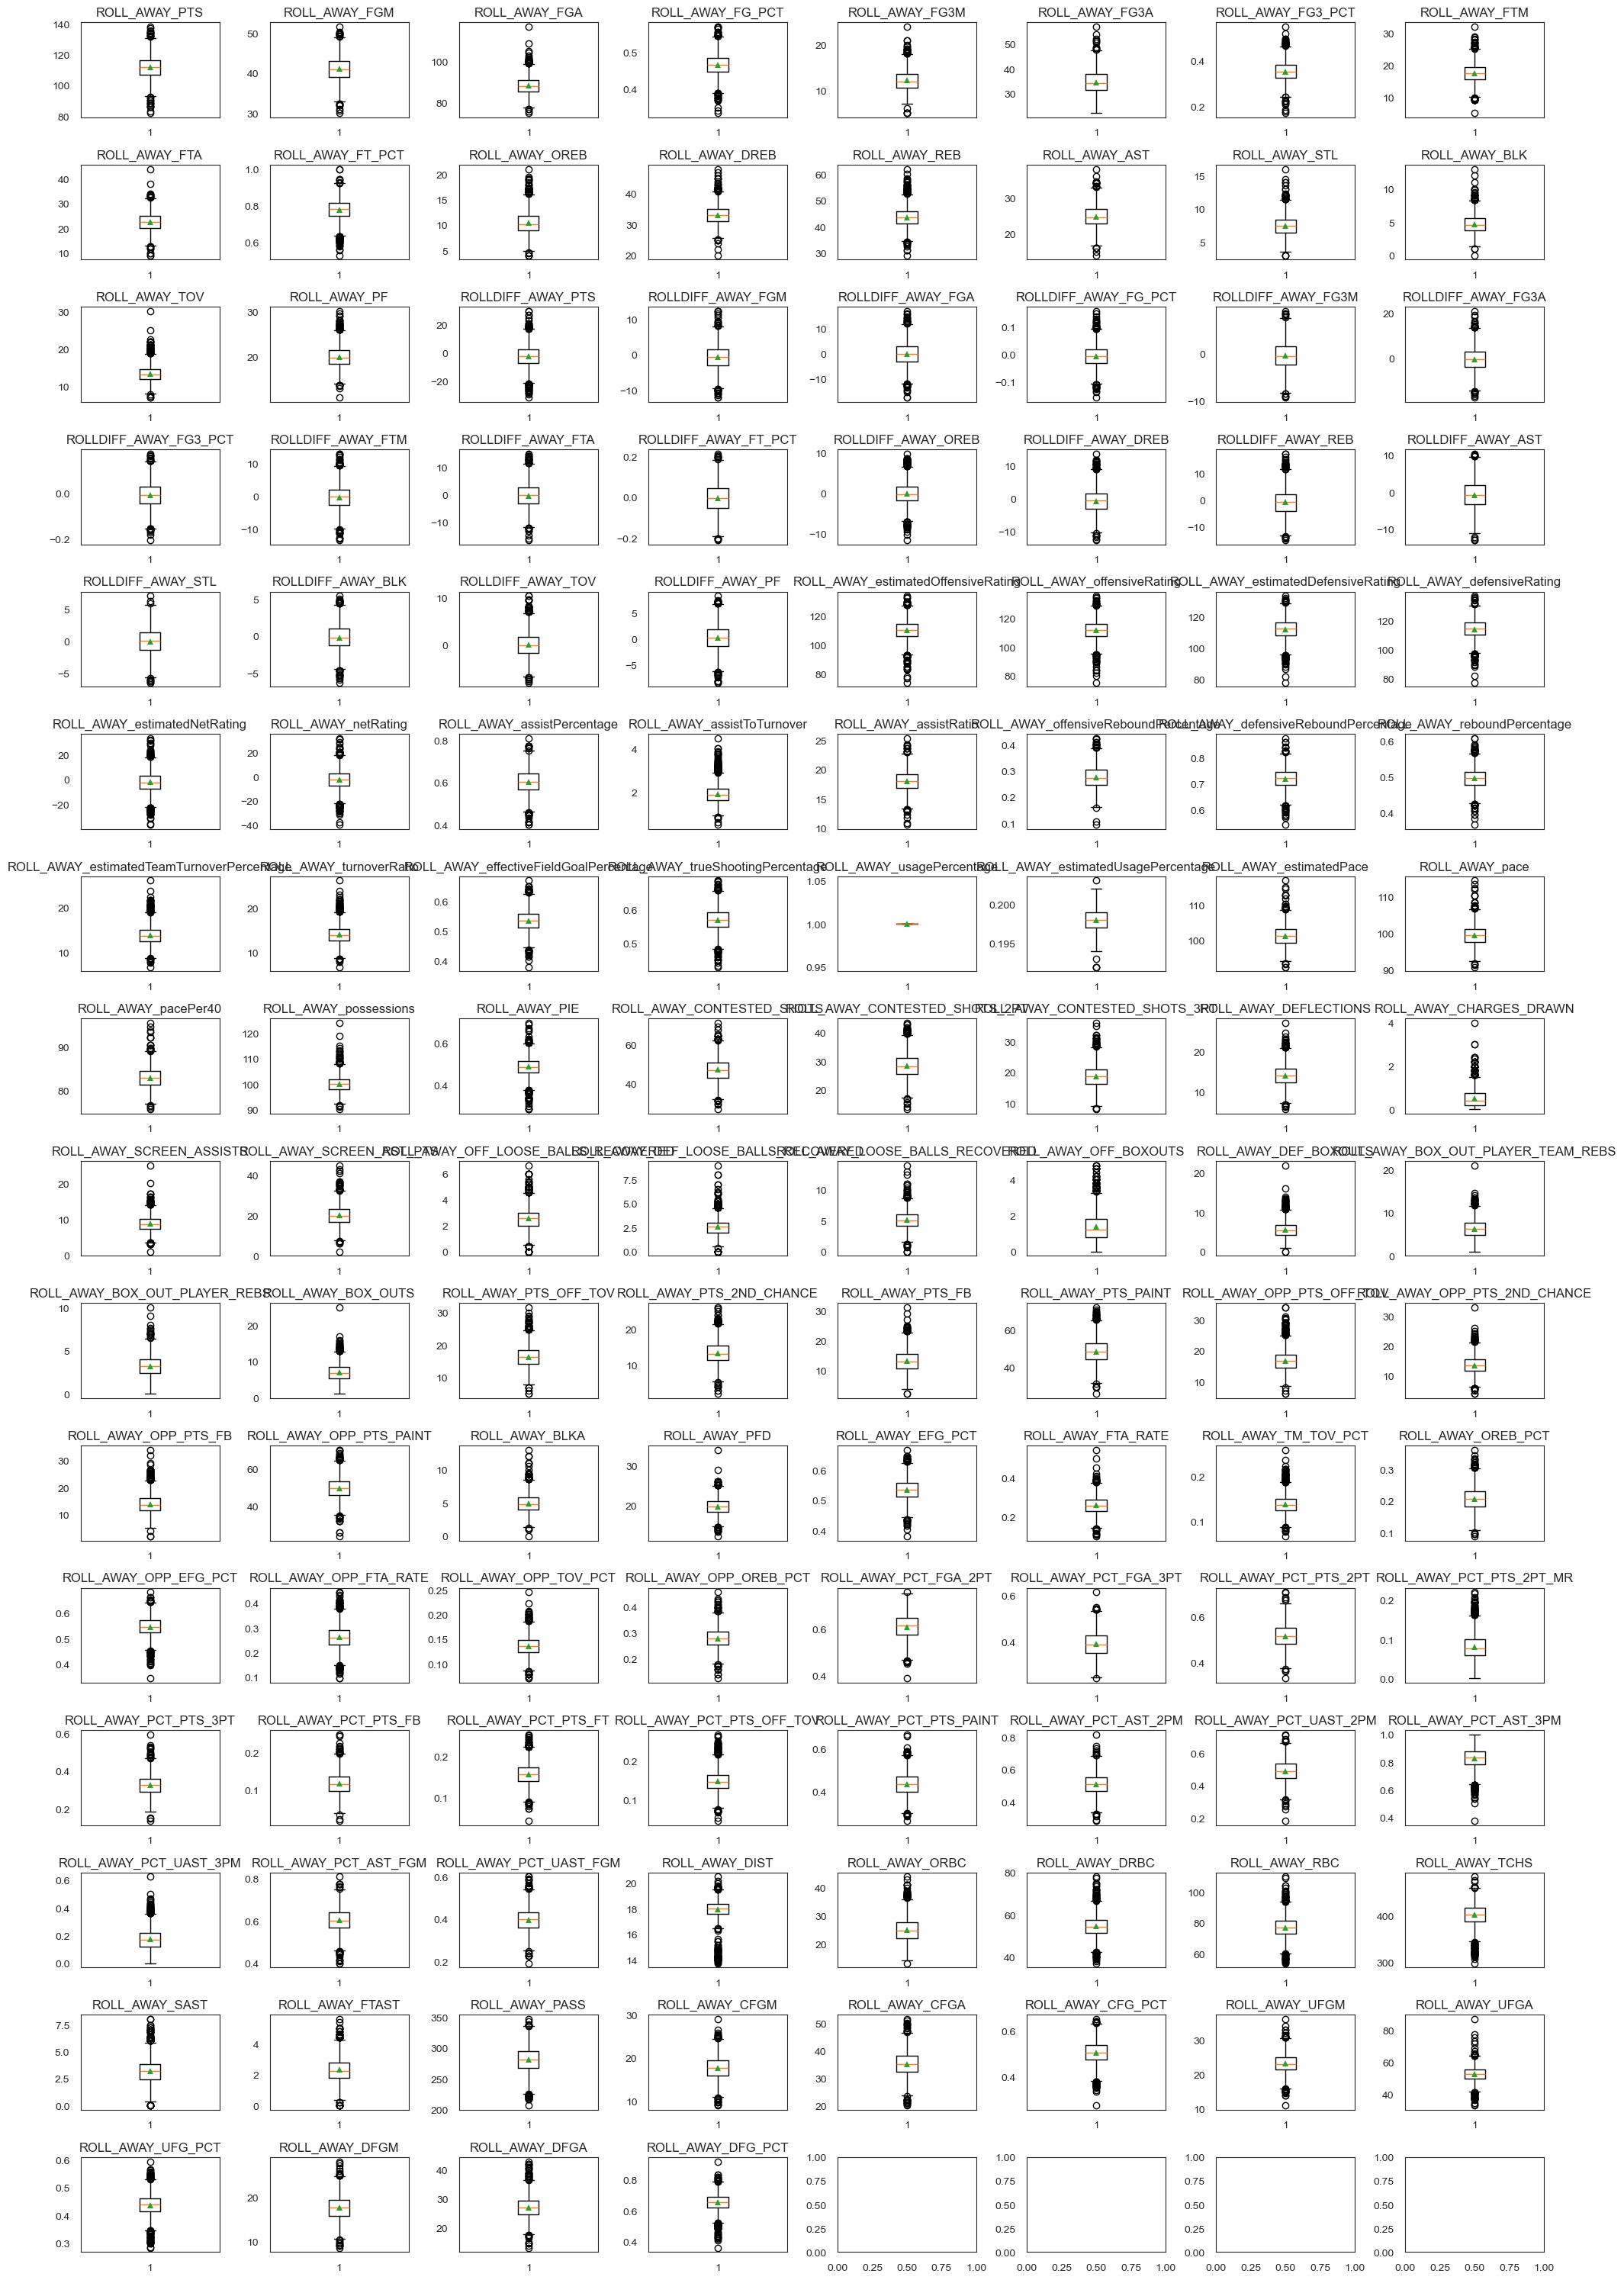

In [30]:
fig, axs = plt.subplots(16, 8, figsize=(20, 30)) 

flat_axs = axs.flatten()

for col_name, ax in zip(away_columns, flat_axs):
    ax.boxplot(filtered_df[col_name], showmeans=True)
    ax.set_title(col_name)

plt.tight_layout()
plt.show()

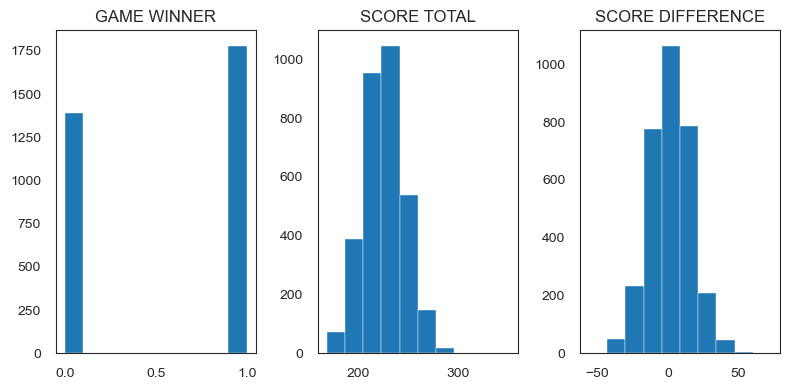

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(8, 4))

for i, ax in enumerate(axs.flatten()):
    ax.hist(team_matchups_all_df[outcome_columns[i]]) 
    ax.set_title(outcome_columns[i])

plt.tight_layout()
plt.show()


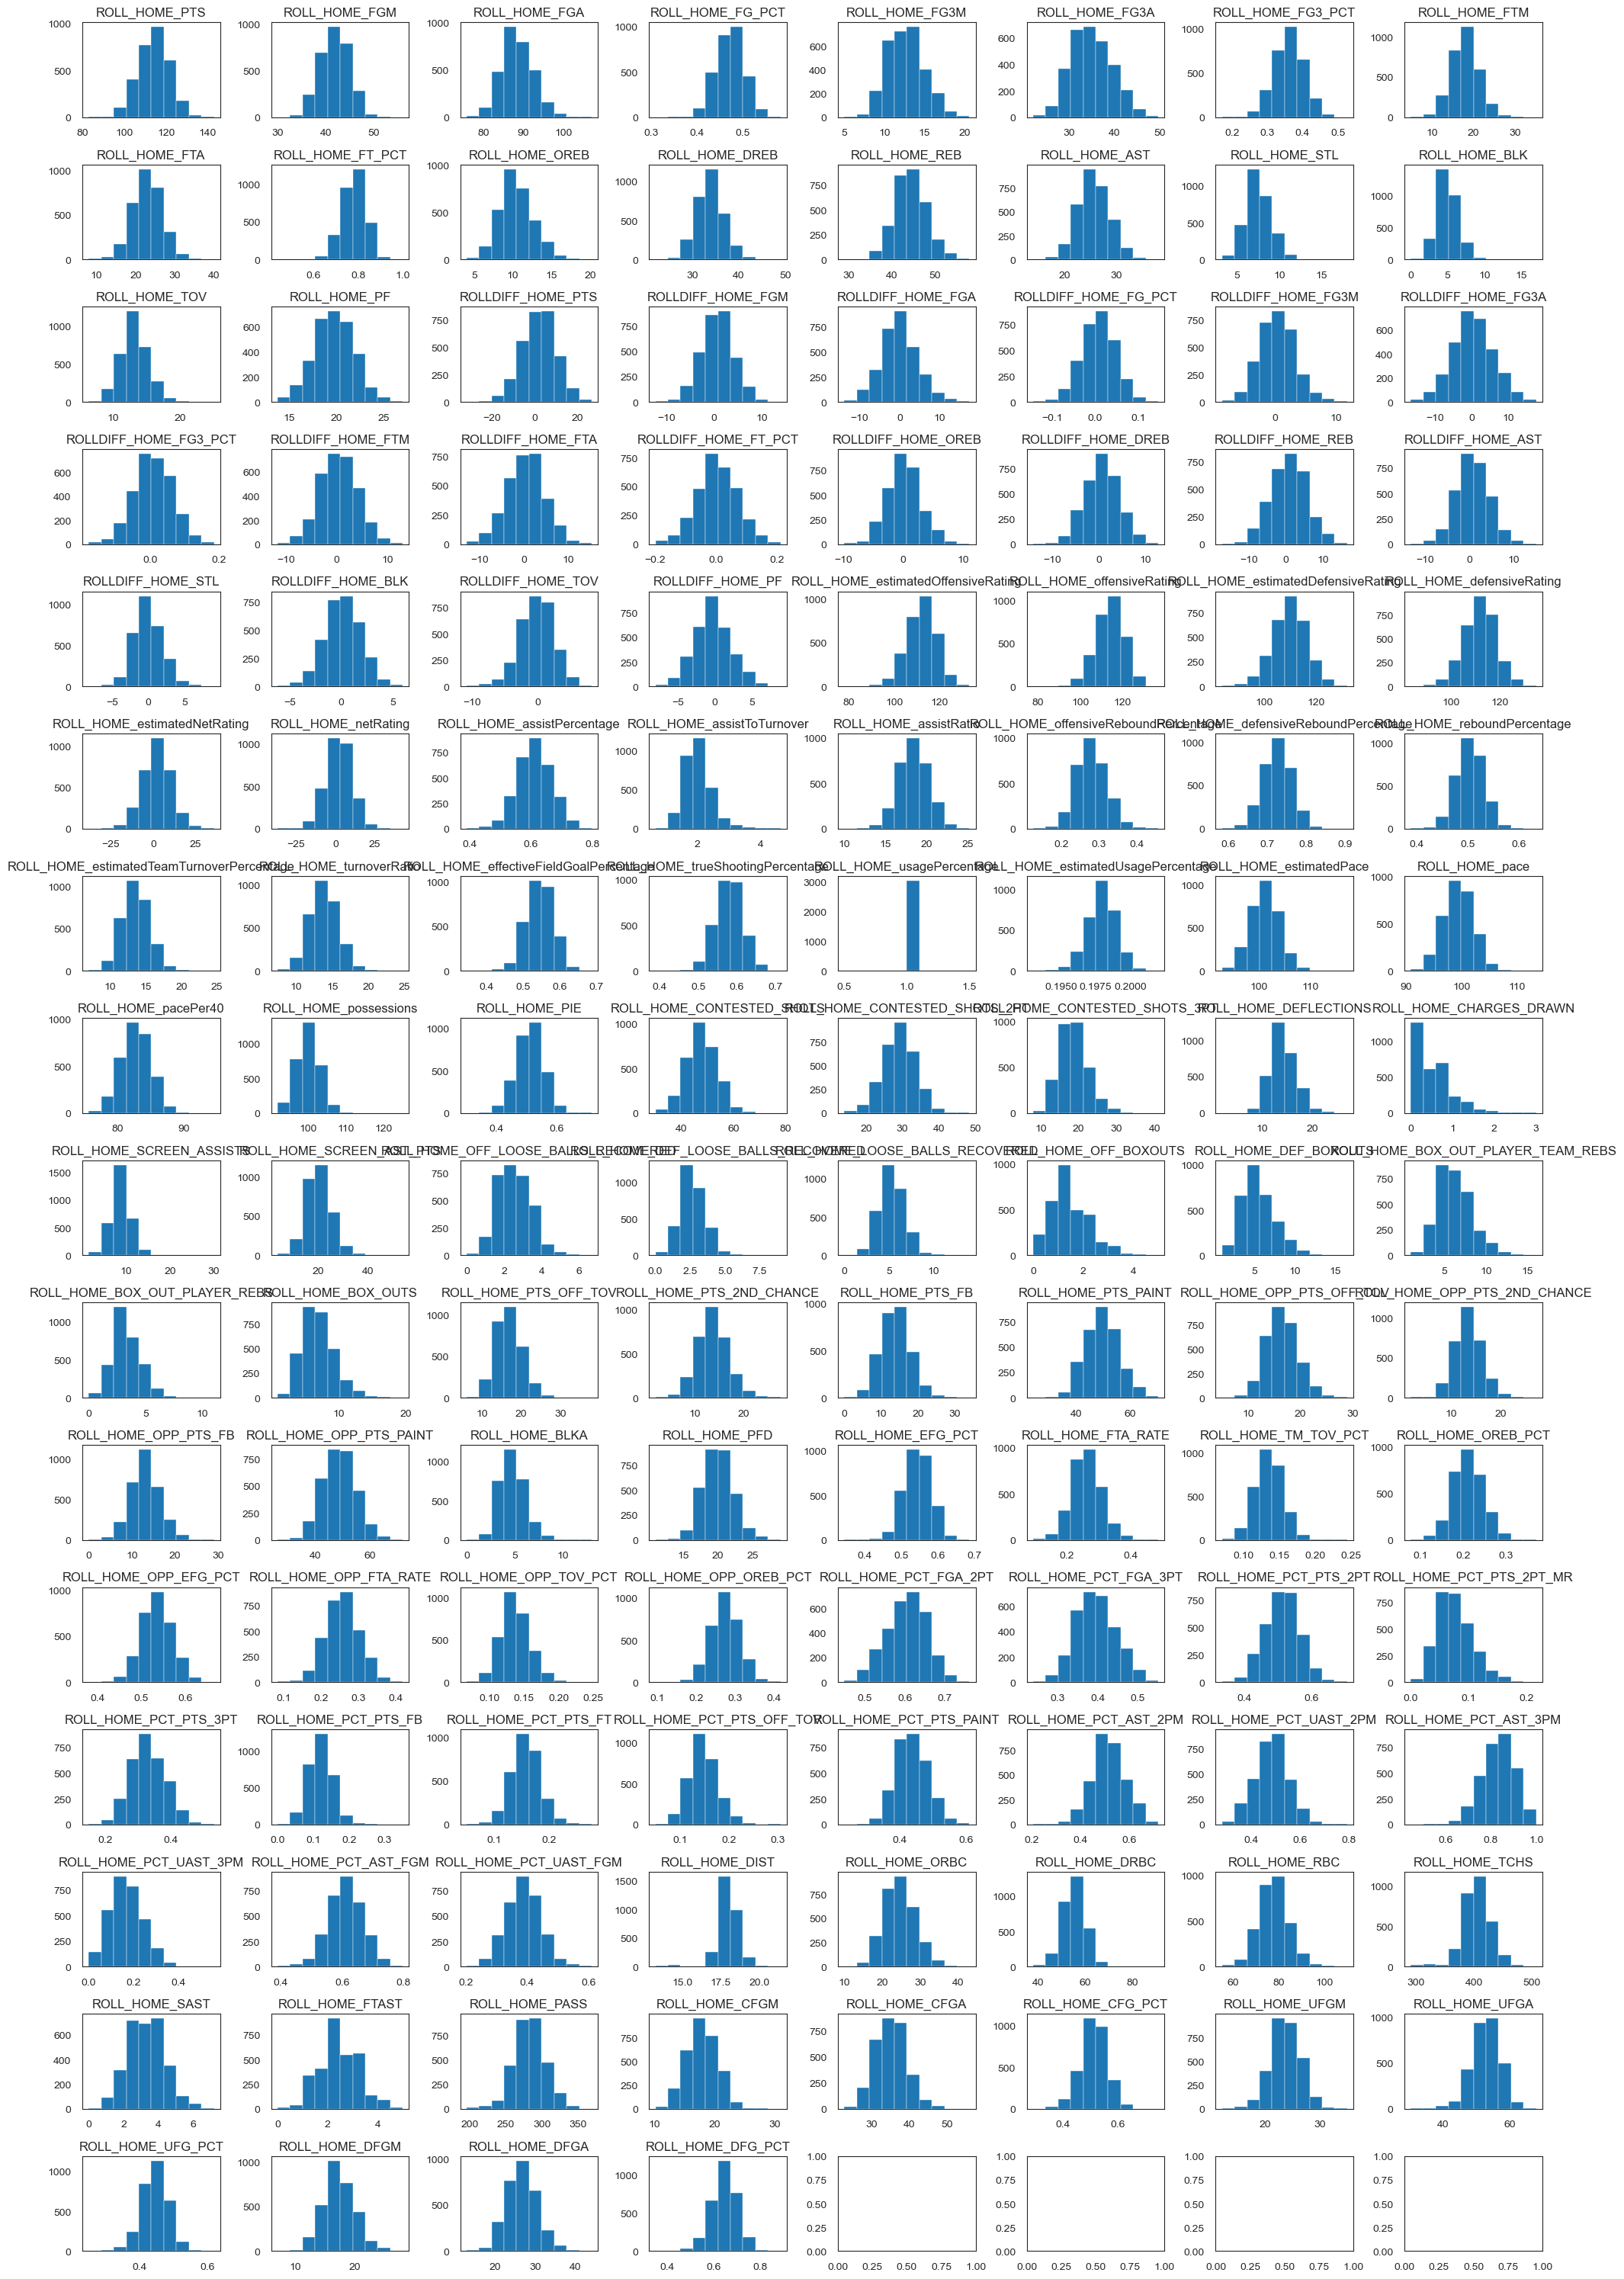

In [34]:
fig, axs = plt.subplots(16, 8, figsize=(20, 30)) 

flat_axs = axs.flatten()

for col_name, ax in zip(home_columns, flat_axs):
    ax.hist(filtered_df[col_name])
    ax.set_title(col_name)

plt.tight_layout()
plt.show()

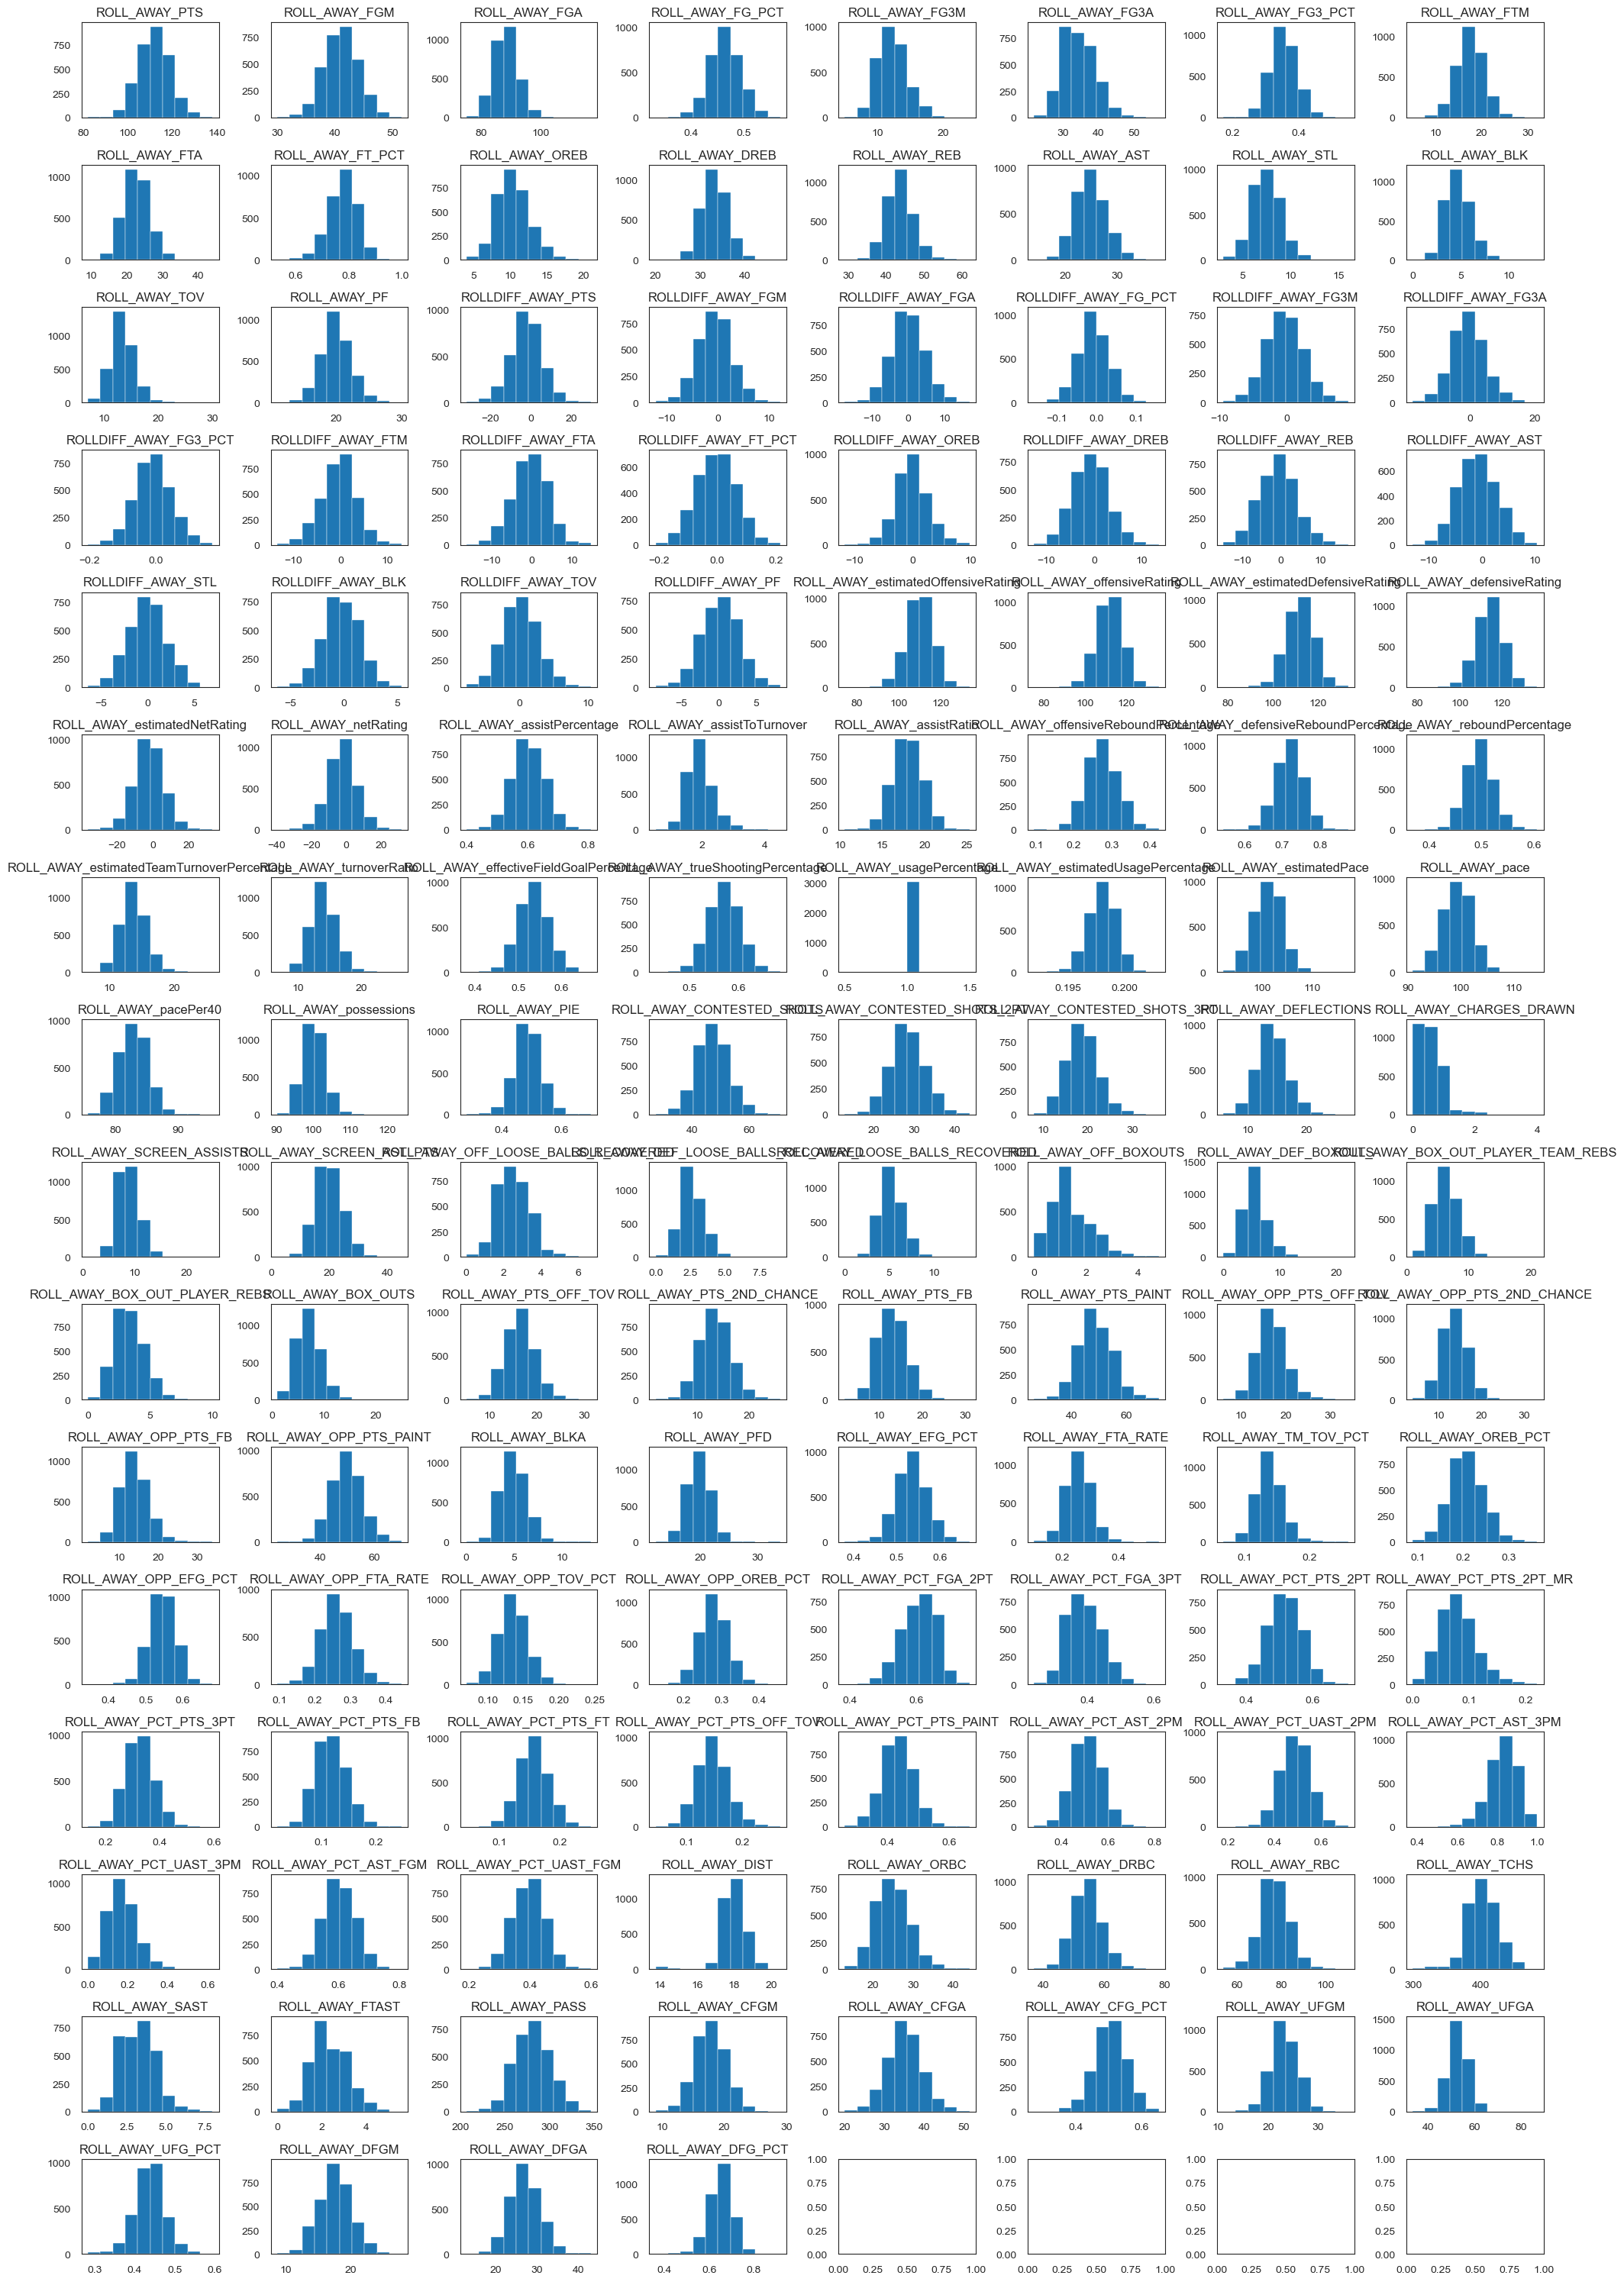

In [35]:
fig, axs = plt.subplots(16, 8, figsize=(20, 30)) 

flat_axs = axs.flatten()

for col_name, ax in zip(away_columns, flat_axs):
    ax.hist(filtered_df[col_name])
    ax.set_title(col_name)

plt.tight_layout()
plt.show()

<a name="3.-Correlations"></a>
# 3. Correlations

[Return to top](#EDAp)

In [104]:
# Separate features and outcomes
features = team_matchups_all_df[home_columns + away_columns]
outcomes = team_matchups_all_df[outcome_columns]

# Calculate Spearman correlation for each feature against each outcome
correlations = {}
for outcome in outcomes:
    correlation = features.corrwith(team_matchups_all_df[outcome], method='spearman')
    correlations[outcome] = correlation.abs()

# Convert the correlations dictionary to a DataFrame
corr_df = pd.DataFrame(correlations)

# Get the maximum absolute correlation for each feature across all outcomes
max_corr = corr_df.max(axis=1)

# Sort by the maximum correlation to get the top 20 features
top_features = max_corr.sort_values(ascending=False).head(20).index.tolist()

# Rename top_features and outcome_columns to replace underscores with spaces and convert to title case
renamed_top_features = [feature.replace('_', ' ').title() for feature in top_features]
renamed_outcome_columns = [outcome.replace('_', ' ').title() for outcome in outcome_columns]

# Create a mapping for old names to new names to rename columns in DataFrame
rename_mapping = dict(zip(top_features + outcome_columns, renamed_top_features + renamed_outcome_columns))

# Use the mapping to rename columns in the DataFrame
team_matchups_all_df.rename(columns=rename_mapping, inplace=True)

# Since the DataFrame's columns are now renamed, directly use the new names for consistency
top_features = renamed_top_features
outcome_columns = renamed_outcome_columns

# Create a new DataFrame with the selected features and outcomes
selected_df = team_matchups_all_df[top_features + outcome_columns]

# Calculate the correlation matrix of the selected features and outcomes
selected_corr = selected_df.corr(method='spearman')

In [105]:
# hierarchical clustering

from scipy.cluster import hierarchy

# Perform hierarchical clustering to reorder the correlation matrix
# The 'ward' method is an option that attempts to minimize the variance within clusters
links = hierarchy.ward(selected_corr)

# Use the linkage matrix to reorder the correlation matrix
dendro = hierarchy.dendrogram(links, no_plot=True)
reordered_index = dendro['leaves']

# Apply the reordering to the correlation matrix
corr_reordered = selected_corr.iloc[reordered_index, reordered_index]

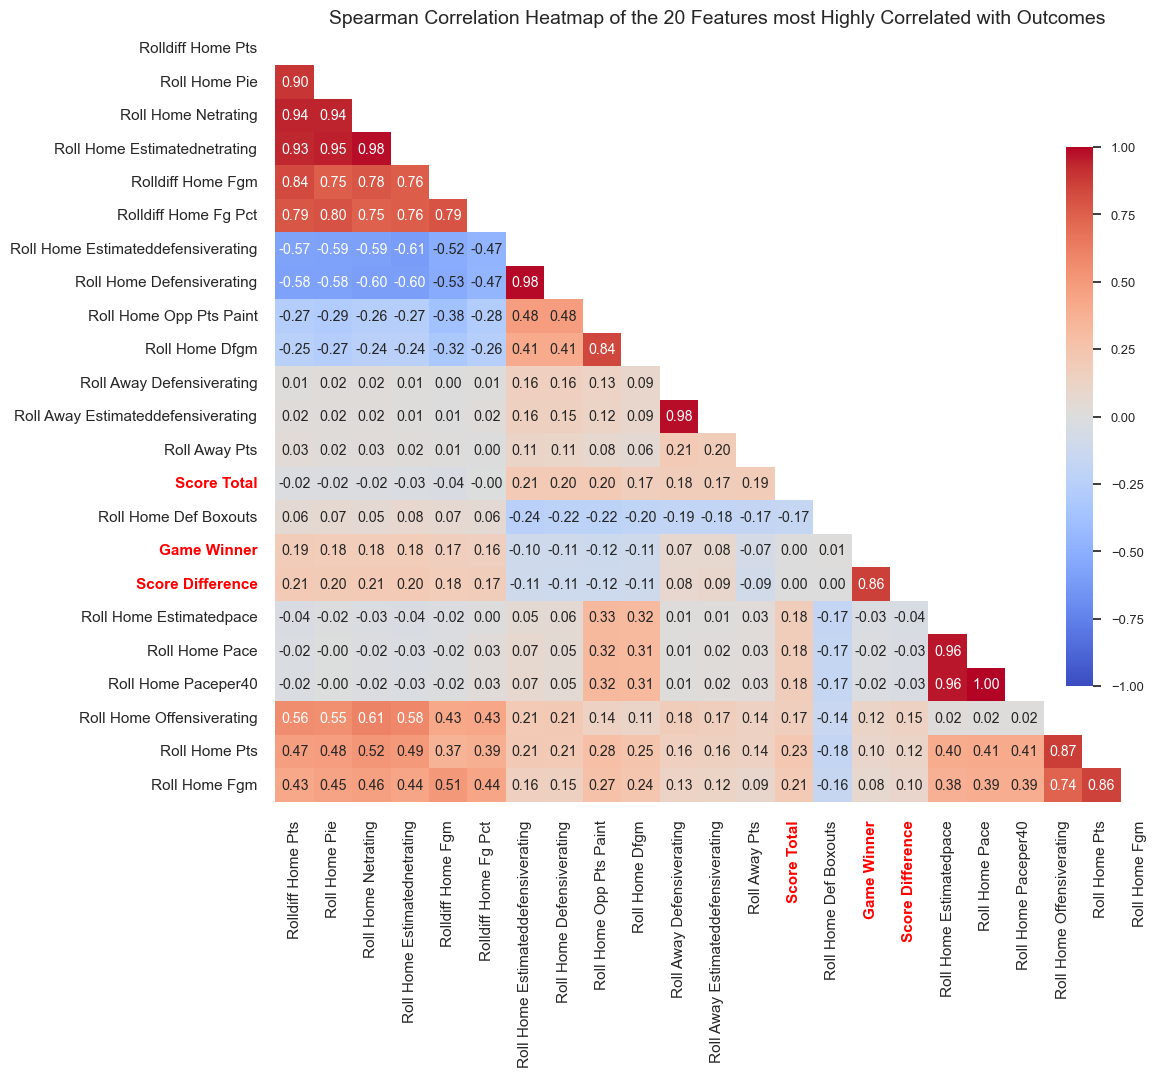

In [138]:
# Plot the reordered correlation matrix
mask = np.triu(np.ones_like(corr_reordered, dtype=bool))

sns.set_style("white")

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_reordered, cmap='coolwarm', vmax=1, vmin=-1, center=0, annot=True, fmt=".2f", 
            xticklabels=selected_corr.columns[reordered_index], 
            yticklabels=selected_corr.columns[reordered_index], 
            cbar_kws={'shrink': 0.7, 'pad': -0.1},
            mask=mask)

# Explicitly remove the grid
ax.grid(False)
sns.set(font_scale=0.85)

# Adjust font size for x and y labels to be slightly bigger
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)  # Adjust label font size
ax.set_yticklabels(ax.get_yticklabels(), fontsize=11)  # Adjust label font size

# Highlight outcome variables by changing the color of their labels
for label in ax.get_xticklabels() + ax.get_yticklabels():
    if label.get_text() in outcome_columns:
        label.set_weight('bold')
        label.set_color('red')

plt.title("Spearman Correlation Heatmap of the 20 Features most Highly Correlated with Outcomes", fontsize=14)
fig.canvas.draw()
plt.show()